In [52]:
import numpy as np
import pandas as pd
# import libraries
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#from sklearn.externals import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
#from tensorflow import set_random_seed
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
import tensorflow as tf
tf.random.set_seed(0) 


from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
import klib

In [55]:
pd.set_option('display.max_columns', None)


In [29]:
df = pd.read_excel("/Users/rajeshm/work/ved/FETTE PI data 24112021.xlsx",header=1)

In [34]:
df.head()

,Date Time,Machine Status,AirFlowVelocity,AvgPF,ChWater_Inlet_Temp,ChWater_Outlet_Temp,Cleaning_Interval,Floor_RH,Floor_Temp,Frequency,HydPump_200Bar,HydPump_400Bar,HydTank_Oil_Temp,Kwh,Motor_Temp,Phase_1_Current,Phase_2_Current,Phase_3_Current,Phase_RB_Voltage,Phase_RY_Voltage,Phase_YB_Voltage,PnumaticAirPressure,WaterFlow_Velocity,Date Time.1,Machine Status.1,AirFlowVelocity.1,AvgPF.1,ChWater_Inlet_Temp.1,ChWater_Outlet_Temp.1,Cleaning_Interval.1,Floor_RH.1,Floor_Temp.1,Frequency.1,HydPump_200Bar.1,HydPump_400Bar.1,HydTank_Oil_Temp.1,Kwh.1,Motor_Temp.1,Phase_1_Current.1,Phase_2_Current.1,Phase_3_Current.1,Phase_RB_Voltage.1,Phase_RY_Voltage.1,Phase_YB_Voltage.1,PnumaticAirPressure.1,WaterFlow_Velocity.1,Date Time.2,Machine Status.2,AirFlowVelocity.2,AvgPF.2,ChWater_Inlet_Temp.2,ChWater_Outlet_Temp.2,Cleaning_Interval.2,Floor_RH.2,Floor_Temp.2,Frequency.2,HydPump_200Bar.2,HydPump_400Bar.2,HydTank_Oil_Temp.2,Kwh.2,Motor_Temp.2,Phase_1_Current.2,Phase_2_Current.2,Phase_3_Current.2,Phase_RB_Voltage.2,Phase_RY_Voltage.2,Phase_YB_Voltage.2,PnumaticAirPressure.2,WaterFlow_Velocity.2,Date Time.3,Machine Status.3,AirFlowVelocity.3,AvgPF.3,ChWater_Inlet_Temp.3,ChWater_Outlet_Temp.3,Cleaning_Interval.3,Floor_RH.3,Floor_Temp.3,Frequency.3,HydPump_200Bar.3,HydPump_400Bar.3,HydTank_Oil_Temp.3,Kwh.3,Motor_Temp.3,Phase_1_Current.3,Phase_2_Current.3,Phase_3_Current.3,Phase_RB_Voltage.3,Phase_RY_Voltage.3,Phase_YB_Voltage.3,PnumaticAirPressure.3,WaterFlow_Velocity.3,Date Time.4,Machine Status.4,AirFlowVelocity.4,AvgPF.4,ChWater_Inlet_Temp.4,ChWater_Outlet_Temp.4,Cleaning_Interval.4,Floor_RH.4,Floor_Temp.4,Frequency.4,HydPump_200Bar.4,HydPump_400Bar.4,HydTank_Oil_Temp.4,Kwh.4,Motor_Temp.4,Phase_1_Current.4,Phase_2_Current.4,Phase_3_Current.4,Phase_RB_Voltage.4,Phase_RY_Voltage.4,Phase_YB_Voltage.4,PnumaticAirPressure.4,WaterFlow_Velocity.4,Date Time.5,Machine Status.5,AirFlowVelocity.5,AvgPF.5,ChWater_Inlet_Temp.5,ChWater_Outlet_Temp.5,Cleaning_Interval.5,Floor_RH.5,Floor_Temp.5,Frequency.5,HydPump_200Bar.5,HydPump_400Bar.5,HydTank_Oil_Temp.5,Kwh.5,Motor_Temp.5,Phase_1_Current.5,Phase_2_Current.5,Phase_3_Current.5,Phase_RB_Voltage.5,Phase_RY_Voltage.5,Phase_YB_Voltage.5,PnumaticAirPressure.5,WaterFlow_Velocity.5,Date Time.6,Machine Status.6,AirFlowVelocity.6,AvgPF.6,ChWater_Inlet_Temp.6,ChWater_Outlet_Temp.6,Cleaning_Interval.6,Floor_RH.6,Floor_Temp.6,Frequency.6,HydPump_200Bar.6,HydPump_400Bar.6,HydTank_Oil_Temp.6,Kwh.6,Motor_Temp.6,Phase_1_Current.6,Phase_2_Current.6,Phase_3_Current.6,Phase_RB_Voltage.6,Phase_RY_Voltage.6,Phase_YB_Voltage.6,PnumaticAirPressure.6,WaterFlow_Velocity.6,Date Time.7,Machine Status.7,AirFlowVelocity.7,AvgPF.7,ChWater_Inlet_Temp.7,ChWater_Outlet_Temp.7,Cleaning_Interval.7,Floor_RH.7,Floor_Temp.7,Frequency.7,HydPump_200Bar.7,HydPump_400Bar.7,HydTank_Oil_Temp.7,Kwh.7,Motor_Temp.7,Phase_1_Current.7,Phase_2_Current.7,Phase_3_Current.7,Phase_RB_Voltage.7,Phase_RY_Voltage.7,Phase_YB_Voltage.7,PnumaticAirPressure.7,WaterFlow_Velocity.7,Date Time.8,Machine Status.8,AirFlowVelocity.8,AvgPF.8,ChWater_Inlet_Temp.8,ChWater_Outlet_Temp.8,Cleaning_Interval.8,Floor_RH.8,Floor_Temp.8,Frequency.8,HydPump_200Bar.8,HydPump_400Bar.8,HydTank_Oil_Temp.8,Kwh.8,Motor_Temp.8,Phase_1_Current.8,Phase_2_Current.8,Phase_3_Current.8,Phase_RB_Voltage.8,Phase_RY_Voltage.8,Phase_YB_Voltage.8,PnumaticAirPressure.8,WaterFlow_Velocity.8,Date Time.9,Machine Status.9,AirFlowVelocity.9,AvgPF.9,ChWater_Inlet_Temp.9,ChWater_Outlet_Temp.9,Cleaning_Interval.9,Floor_RH.9,Floor_Temp.9,Frequency.9,HydPump_200Bar.9,HydPump_400Bar.9,HydTank_Oil_Temp.9,Kwh.9,Motor_Temp.9,Phase_1_Current.9,Phase_2_Current.9,Phase_3_Current.9,Phase_RB_Voltage.9,Phase_RY_Voltage.9,Phase_YB_Voltage.9,PnumaticAirPressure.9,WaterFlow_Velocity.9,Date Time.10,Machine Status.10,AirFlowVelocity.10,AvgPF.10,ChWater_Inlet_Temp.10,ChWater_Outlet_Temp.10,Cleaning_Interval.10,Floor_RH.10,Floor_Temp.10,Frequency.10,HydPump_200Bar.10,HydPump_400Bar.10,HydTank_Oil_Temp.10,Kwh.10,Motor_Temp.10,Phas

In [31]:
df.columns

Index(['Date Time', 'Machine Status', 'AirFlowVelocity', 'AvgPF',
       'ChWater_Inlet_Temp', 'ChWater_Outlet_Temp', 'Cleaning_Interval',
       'Floor_RH', 'Floor_Temp', 'Frequency',
       ...
       'Kwh.13', 'Motor_Temp.13', 'Phase_1_Current.13', 'Phase_2_Current.13',
       'Phase_3_Current.13', 'Phase_RB_Voltage.13', 'Phase_RY_Voltage.13',
       'Phase_YB_Voltage.13', 'PnumaticAirPressure.13',
       'WaterFlow_Velocity.13'],
      dtype='object', length=320)

In [21]:
df.shape

(4322, 320)

In [24]:
df.size

1383040

In [32]:
df["Machine Status"].value_counts()

Idle              1990
Inspection        1045
Production         799
Cleaning           332
Carrier Change     155
Name: Machine Status, dtype: int64

In [36]:
first_machine = df.iloc[:, : 23]

In [57]:
first_machine.head(2)

,Date Time,Machine Status,AirFlowVelocity,AvgPF,ChWater_Inlet_Temp,ChWater_Outlet_Temp,Cleaning_Interval,Floor_RH,Floor_Temp,Frequency,HydPump_200Bar,HydPump_400Bar,HydTank_Oil_Temp,Kwh,Motor_Temp,Phase_1_Current,Phase_2_Current,Phase_3_Current,Phase_RB_Voltage,Phase_RY_Voltage,Phase_YB_Voltage,PnumaticAirPressure,WaterFlow_Velocity
0,2021-05-01 00:00:00,Idle,51.409443,0.465152,14.074251,32.402599,24,0,2.363157e+23,49.932709,0.146003,0.345999,42.536003,46707.625,58.619362,1.314062,1.461213,1.026197,412.449707,411.310181,411.490204,5.035713,50.014511
1,2021-05-01 00:05:00,Idle,51.832512,0.464170,14.100927,32.395061,24,0,2.360209e+23,49.933193,0.146389,0.346386,42.479176,46707.625,58.539730,1.313911,1.460970,1.026129,412.458496,411.320526,411.499969,5.023071,50.331062


In [58]:
klib.missingval_plot(first_machine) # default representation of missing values in a DataFrame, plenty of settings are available

No missing values found in the dataset.


In [64]:
first_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4321 entries, 0 to 4320
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date Time            4321 non-null   datetime64[ns]
 1   Machine Status       4321 non-null   object        
 2   AirFlowVelocity      4321 non-null   float64       
 3   AvgPF                4321 non-null   float64       
 4   ChWater_Inlet_Temp   4321 non-null   float64       
 5   ChWater_Outlet_Temp  4321 non-null   float64       
 6   Cleaning_Interval    4321 non-null   object        
 7   Floor_RH             4321 non-null   int64         
 8   Floor_Temp           4321 non-null   float64       
 9   Frequency            4321 non-null   float64       
 10  HydPump_200Bar       4321 non-null   float64       
 11  HydPump_400Bar       4321 non-null   float64       
 12  HydTank_Oil_Temp     4321 non-null   float64       
 13  Kwh                  4321 non-nul

In [65]:
first_machine.Cleaning_Interval.value_counts()

24             883
19             620
23             579
21             319
22             268
20             186
18             172
25             156
17             130
14              93
12              92
16              86
13              79
11              77
15              72
10              66
8               61
4               60
5               60
9               60
7               59
6               58
3               36
2               11
37               3
27               3
32               3
44               3
26               2
41               2
38               2
31               2
36               2
34               2
33               2
29               2
28               2
Calc Failed      2
43               1
42               1
40               1
39               1
35               1
30               1
Name: Cleaning_Interval, dtype: int64

In [68]:
#Tis will replace row entry Calc Failed with 999.
first_machine = first_machine.replace(to_replace =["Calc Failed"], 
                            value =999)

In [69]:
first_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4321 entries, 0 to 4320
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date Time            4321 non-null   datetime64[ns]
 1   Machine Status       4321 non-null   object        
 2   AirFlowVelocity      4321 non-null   float64       
 3   AvgPF                4321 non-null   float64       
 4   ChWater_Inlet_Temp   4321 non-null   float64       
 5   ChWater_Outlet_Temp  4321 non-null   float64       
 6   Cleaning_Interval    4321 non-null   int64         
 7   Floor_RH             4321 non-null   int64         
 8   Floor_Temp           4321 non-null   float64       
 9   Frequency            4321 non-null   float64       
 10  HydPump_200Bar       4321 non-null   float64       
 11  HydPump_400Bar       4321 non-null   float64       
 12  HydTank_Oil_Temp     4321 non-null   float64       
 13  Kwh                  4321 non-nul

In [71]:
# Import label encoder for target variable
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
first_machine['Machine Status']= label_encoder.fit_transform(first_machine['Machine Status'])
 
first_machine['Machine Status'].unique()

array([2, 3, 1, 4, 0])

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

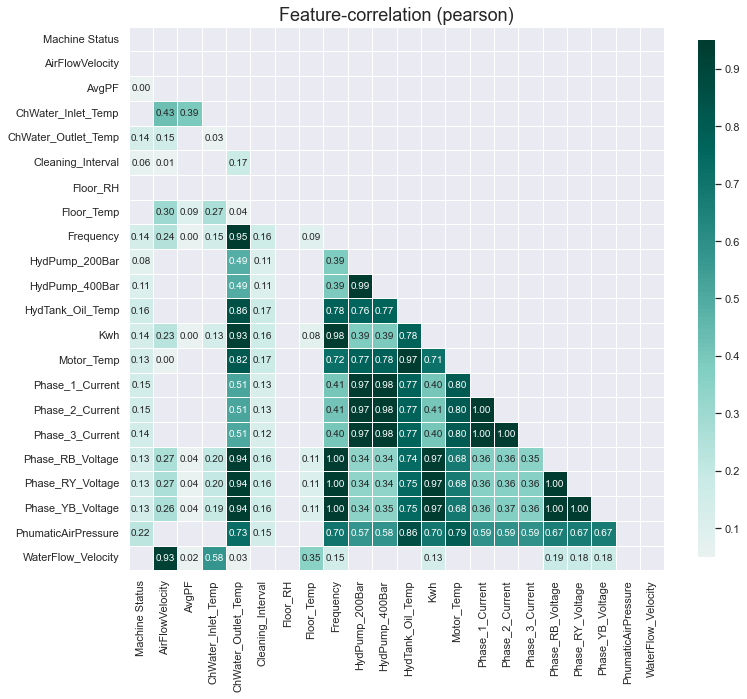

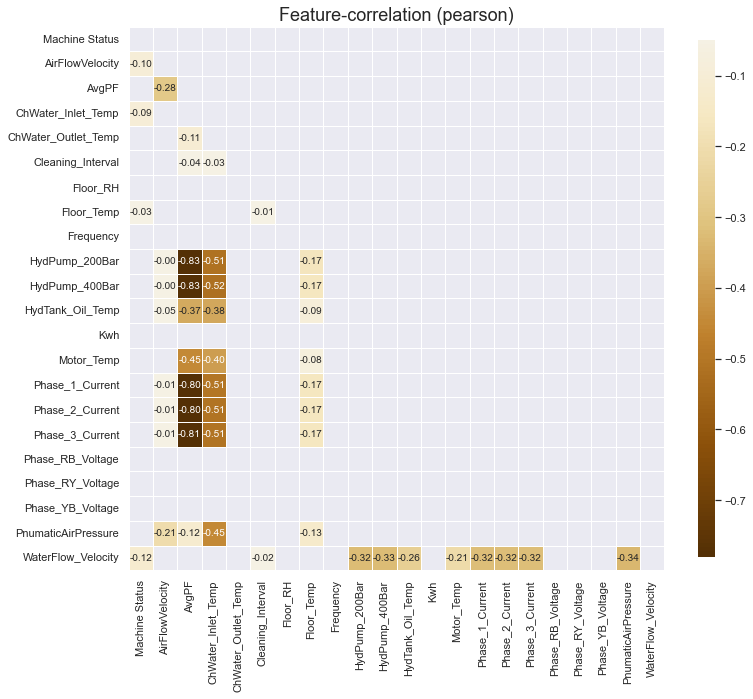

In [73]:
klib.corr_plot(first_machine, split='pos') # displaying only positive correlations, other settings include threshold, cmap...
klib.corr_plot(first_machine, split='neg') # displaying only negative correlations

In [81]:
first_machine = first_machine.drop("Date Time",axis=1)


In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

# the independent variables set
X = first_machine.drop('Machine Status',axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                feature       VIF
0       AirFlowVelocity  0.793372
1                 AvgPF  0.685080
2    ChWater_Inlet_Temp  0.337674
3   ChWater_Outlet_Temp  0.073543
4     Cleaning_Interval  0.672803
5              Floor_RH       NaN
6            Floor_Temp  2.019002
7             Frequency  0.058962
8        HydPump_200Bar  0.446020
9        HydPump_400Bar  0.443033
10     HydTank_Oil_Temp  0.126738
11                  Kwh  0.062047
12           Motor_Temp  0.162477
13      Phase_1_Current  0.409309
14      Phase_2_Current  0.404514
15      Phase_3_Current  0.414981
16     Phase_RB_Voltage  0.058018
17     Phase_RY_Voltage  0.058103
18     Phase_YB_Voltage  0.058107
19  PnumaticAirPressure  0.198100
20   WaterFlow_Velocity  1.030052


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

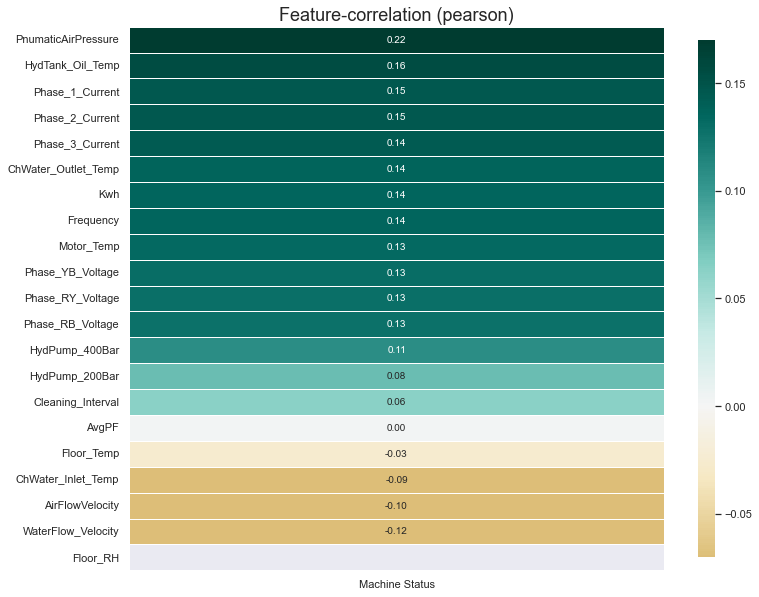

In [85]:
klib.corr_plot(first_machine, target='Machine Status')


In [86]:
# AvgPF is not corelated with our target variable so we are dropping from our dataframe
first_machine = first_machine.drop("AvgPF",axis=1)

# Multiclass Classification having Target Variable as Machine Status

In [87]:
X = first_machine.drop('Machine Status',axis=1)
y = first_machine["Machine Status"]

Class=2, n=1990 (46.054%)
Class=3, n=1045 (24.184%)
Class=1, n=332 (7.683%)
Class=4, n=799 (18.491%)
Class=0, n=155 (3.587%)


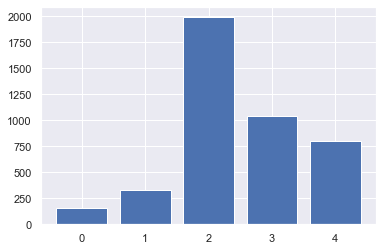

In [90]:
from collections import Counter
from matplotlib import pyplot

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=2, n=1990 (20.000%)
Class=3, n=1990 (20.000%)
Class=1, n=1990 (20.000%)
Class=4, n=1990 (20.000%)
Class=0, n=1990 (20.000%)


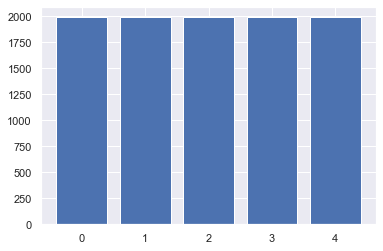

In [94]:
# transform the dataset
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [99]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [100]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [101]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9105527638190954


In [113]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Phase_2_Current        0.134231
Phase_1_Current        0.109103
Phase_3_Current        0.096145
HydPump_400Bar         0.093290
HydPump_200Bar         0.076351
Kwh                    0.071509
Motor_Temp             0.059765
AirFlowVelocity        0.040346
PnumaticAirPressure    0.039455
HydTank_Oil_Temp       0.035270
Floor_Temp             0.033078
ChWater_Outlet_Temp    0.031341
Cleaning_Interval      0.030695
WaterFlow_Velocity     0.029094
Phase_YB_Voltage       0.025420
Frequency              0.025333
ChWater_Inlet_Temp     0.024799
Phase_RY_Voltage       0.022390
Phase_RB_Voltage       0.022387
Floor_RH               0.000000
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


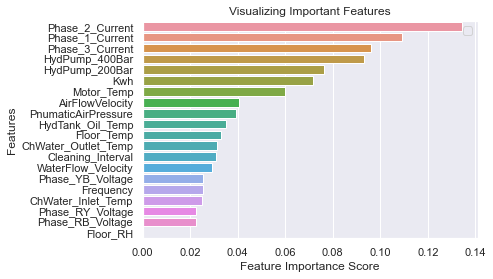

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()